# Sizing Apriltags for Calibratin Targets

Kevin J. Walchko

---

Here we are going to use `aruco` to detect the `apriltag` so we don't have to include yet another library. 

- Pick Apriltag 2 if you want maximum software support. 
- Pick Apriltag 3 if you want the newest features and are willing to work with bare bones software. Not supported by `cv2.aruco`
- **Apriltag 2**
    - `36h11` is recommended for most applications. It is the most robust tag and has the most tag ids available. 
    - `25h9` if you need more distance and are willing to sacrifice robustness and the number of tag ids. 
    - `16h5` if you need maximum range and are willing to accept a very high false positive rate and limited tag ids. This family is not recommended unless you have a specific application in mind. If you are attempting to increase detection distance it is recommended you increase your camera's resolution/zoom and increase the tag size before picking `16h5`.
- **Apriltag 3** 
    - `Standard52h13` is recommended by the creators of Apriltag. It is the most robust tag and has a large number of tag ids available. 
    - `Custom48h12` is great for placing logos inside your tags and making drone landing targets. 
    - `Circle49h12` is great if you want a more circular tag.

## Detection

Max detection distance is given by:

$$
distance_{max} = \frac {tagSize} {2 \cdot \tan(\frac {bitWidth \cdot FOV_{horizontal} \cdot pixReq)} {2 \cdot numPix_{horizontal}})}
$$

- tagSize: size of your tag in meters - Optitag calls this Edge Length or size
- bitWidth: the number of bits that span the width of the tag (excluding the white border for Apriltag 2). ex: 36h11 = 8, 25h9 = 6, standard41h12 = 9
- $FOV_{horizontal}$: horizontal FOV of your camera
- $numPix_{horizontal}$: horizontal resolution of you camera
- pixReq: the number of pixels required to detect a bit. This is an adjustable constant. We recommend 5. Lowest number we recommend is 2 which is the Nyquist Frequency. We recommend 5 to avoid some of the detection pitfalls mentioned above.

## References

- [Optitag blog](https://optitag.io/blogs/news/designing-your-perfect-apriltag)

In [2]:
# reload library
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import cv2
import cv2.aruco as aruco
from matplotlib import pyplot as plt
# from pathlib import Path

import opencv_camera
print("OpenCV Camera:", opencv_camera.__version__)

from math import asin, atan2,pi

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

def scale(im, s=1.0):
    (h,w) = im.shape[:2]
    return cv2.resize(im, (int(s*w), int(s*h),), interpolation=cv2.INTER_AREA)

deg = u"\xb0" # unicode degree symbol

OpenCV Camera: 0.11.0


In [4]:
from opencv_camera import ApriltagMarker
from collections import namedtuple

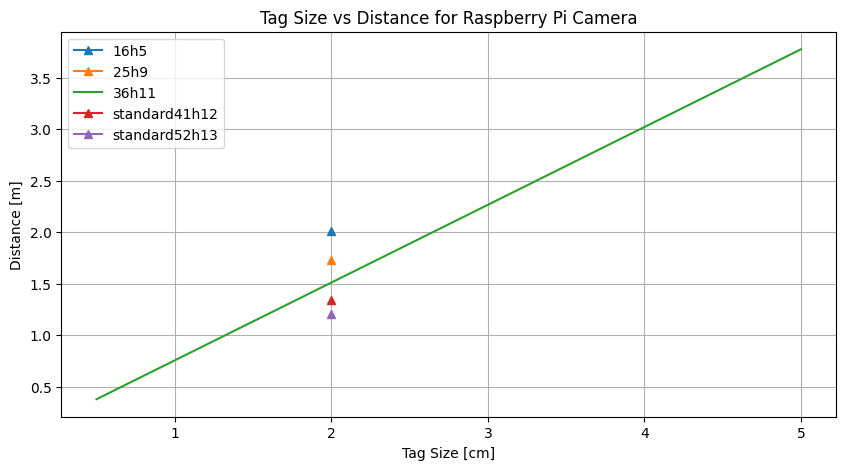

In [28]:
def distance(t):
    b = 8
    f = 62.2 * np.pi / 180
    p = 5
    r = 3280
    return t / (2*np.tan((b*f*p)/(2*r)))

def distanceBits(t, b):
    t = t / 100 # change from cm to m
    f = 62.2 * np.pi / 180
    p = 5 # minimum number of pixel per tag bit
    r = 3280 # px
    return t / (2*np.tan((b*f*p)/(2*r)))

tagSize = np.arange(0.005, 0.05, 0.001) # 1 - 5 cm
dist = distance(tagSize)

plt.figure(figsize=(10,5))

# two tags of same size (10mm), you can see the smaller bit width
# farther out, because the black/white blocks are bigger
# HWOEVER, the lower hamming distance on the lower bit tags means
# increase False Positive rate
x = 2 # cm
plt.plot(x, distanceBits(x,6), marker="^", label="16h5")
plt.plot(x, distanceBits(x,7), marker="^", label="25h9")
plt.plot(tagSize*100, dist, label="36h11")
plt.plot(x, distanceBits(x,9), marker="^", label="standard41h12")
plt.plot(x, distanceBits(x,10), marker="^", label="standard52h13")

plt.grid(True)
plt.title("Tag Size vs Distance for Raspberry Pi Camera")
plt.xlabel("Tag Size [cm]")
plt.ylabel("Distance [m]")
plt.legend();